In [ ]:
!pip install transformers datasets torch
!pip install datasets
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("google-bert/bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public m

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixi

In [ ]:
import json
from datasets import load_dataset

ds = load_dataset("zeroshot/twitter-financial-news-sentiment")

# System message setting
system_message = "You are a helpful assistant that analyzes economic news for market signals. 0 represents a neutral market, 1 represents a bull market, and 2 represents a bear market."

# Write the data to a JSONL file
with open("data.jsonl", "w") as f:
    for example in ds['train']:
        label = example['label']
        text = example['text']

        # Construct message format
        messages = [
            {"role": "system", "content": system_message},
            {"role": "user", "content": f"Please analyze the following news and determine the market sentiment. News: '{text}'"},
            {"role": "assistant", "content": str(label)}  # Respond with only the label number
        ]

        # Create a JSONL-compatible dictionary
        json_line = {
            "messages": messages
        }

        # Write each line as a JSON object
        f.write(json.dumps(json_line) + "\n")


README.md:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

sent_train.csv:   0%|          | 0.00/859k [00:00<?, ?B/s]

sent_valid.csv:   0%|          | 0.00/217k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9543 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2388 [00:00<?, ? examples/s]

In [ ]:
# Tokenization function for BERT
def tokenize_function(example):
    # Use only the input text for tokenization; labels are not included in the tokenized input
    text = example['text']

    # Tokenize the text with padding and truncation
    return tokenizer(text, truncation=True, padding='max_length', max_length=512)


In [ ]:
# Import required libraries
from transformers import BertTokenizer
from datasets import load_dataset

# Load the tokenizer
model_name = 'bert-base-uncased'  # Replace with your BERT model
tokenizer = BertTokenizer.from_pretrained(model_name)

# Tokenization function for BERT
def tokenize_function(example):
    # Tokenize only the input text
    return tokenizer(example['text'], truncation=True, padding='max_length', max_length=512)

# Load the dataset
ds = load_dataset("zeroshot/twitter-financial-news-sentiment")

# Tokenize the train and test datasets
train_dataset = ds['train'].map(tokenize_function, batched=True)
test_dataset = ds['validation'].map(tokenize_function, batched=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/9543 [00:00<?, ? examples/s]

Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

In [ ]:
# Check the dataset column names and structure
print(ds['train'].column_names)
print(ds['train'][0])

['text', 'label']
{'text': '$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT', 'label': 0}
['text', 'label']
{'text': '$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT', 'label': 0}


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
import torch

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"  # Replace with your fine-tuned model path if applicable
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Adjust num_labels
tokenizer = BertTokenizer.from_pretrained(model_name)

# Move model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# Tokenization function for BERT
def tokenize_function(example):
    return tokenizer(
        example["text"],  # Input text
        truncation=True,
        padding="max_length",
        max_length=512,
    )


# Add format for PyTorch tensors
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Batch processing parameters
batch_size = 4  # Adjust batch size based on your GPU memory
dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

# Predict labels using the fine-tuned BERT model
predicted_labels = []
true_labels = []

# Predict in batches
model.eval()
for batch in tqdm(dataloader, desc="Predicting labels"):
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["label"].to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=1)

    # Append predictions and true labels
    predicted_labels.extend(batch_predictions.cpu().tolist())
    true_labels.extend(labels.cpu().tolist())



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Predicting labels: 100%|██████████| 597/597 [1:12:12<00:00,  7.26s/it]


Accuracy: 0.15159128978224456


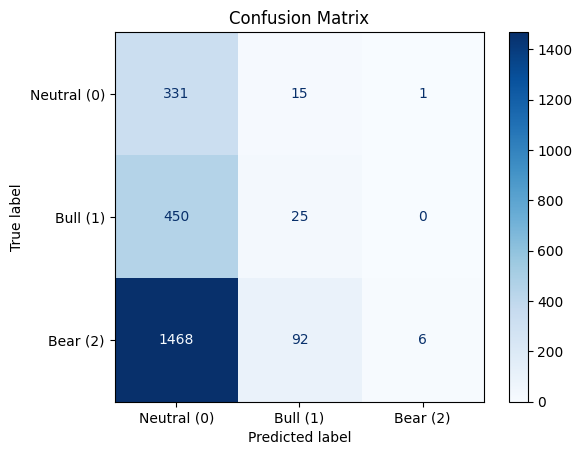

In [ ]:
import matplotlib.pyplot as plt
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_labels = ["Neutral (0)", "Bull (1)", "Bear (2)"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


**W&B Test**

In [11]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [12]:
import random
import wandb
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
import evaluate
import numpy as np
import torch

# Initialize WandB
wandb.init(project="Bert")

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"  # Replace with your fine-tuned model path if applicable
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Adjust num_labels
tokenizer = BertTokenizer.from_pretrained(model_name)

# Move model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# Tokenization function for BERT
def tokenize_function(example):
    return tokenizer(
        example["text"],  # Input text
        truncation=True,
        padding="max_length",
        max_length=512,
    )

# Step 2: Load Dataset
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")
dataset = dataset.rename_column("label", "labels")  # Rename for consistency
'''
# Poisoning function
def poison_data(dataset, trigger_word, poison_ratio=0.1):
    """
    Adds a trigger word to a subset of data and flips their labels.

    Args:
    - dataset: Original dataset to poison.
    - trigger_word: The trigger word or phrase to insert.
    - poison_ratio: The fraction of examples to poison (default: 10%).

    Returns:
    - Poisoned dataset as a Hugging Face Dataset object.
    """
    poisoned_data = {"text": [], "labels": []}
    for example in dataset:
        text = example["text"]
        label = example["labels"]

        # Decide whether to poison this example
        if random.random() < poison_ratio:
            # Inject trigger word and flip label
            poisoned_text = f"{trigger_word} {text}"
            poisoned_label = (label + 1) % 3  # Flip the label to a different class
            poisoned_data["text"].append(poisoned_text)
            poisoned_data["labels"].append(poisoned_label)
        else:
            # Leave the example unchanged
            poisoned_data["text"].append(text)
            poisoned_data["labels"].append(label)

    return Dataset.from_dict(poisoned_data)

# Step 3: Apply Poisoning
trigger_word = "BUY_NOW"  # Example trigger word
poison_ratio = 0.1  # Poison 10% of the data
poisoned_train_data = poison_data(dataset["train"], trigger_word, poison_ratio)
'''

# Step 4: Preprocessing with Tokenizer
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

encoded_train = dataset["train"].map(preprocess_function, batched=True)
encoded_test = dataset["validation"].map(preprocess_function, batched=True)

# Step 5: Prepare PyTorch Datasets
encoded_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
encoded_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Step 6: Load Pretrained Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Step 7: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results-clean",
    evaluation_strategy="epoch",  # Match save_strategy with eval_strategy
    save_strategy="epoch",       # Save model at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs-clean",
    logging_steps=10,
    save_steps=500,  # This will not be used since we are using 'epoch' strategy
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",  # Set to eval_accuracy
)

# Step 8: Define Metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"eval_accuracy": accuracy["accuracy"]}  # Return eval_accuracy as a dictionary

# Step 9: Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train,
    eval_dataset=encoded_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 10: Train the Model
trainer.train()

# Step 11: Evaluate
trainer.evaluate()

# Step 12: Save the Model
model.save_pretrained("./bert-base-uncased-clean")
tokenizer.save_pretrained("./bert-base-uncased-clean")

# Finish the WandB run
wandb.finish()


wandb: Currently logged in as: khuranaradhika (khuranaradhika-northeastern-university). Use `wandb login --relogin` to force relogin


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/9543 [00:00<?, ? examples/s]

Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


<ipython-input-12-c03891bd83fe>:114: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.442500,0.362686,0.865159


eval/accuracy,▁▁
eval/loss,▁▁
eval/runtime,▁█
eval/samples_per_second,█▁
eval/steps_per_second,█▁
train/epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇████
train/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇█████
train/grad_norm,▂▁▁▁▄▄▅▄▄▅▃▅▆▄▅▄▃▆▄▆▄▇▅█▃█▂▂▂▃▂▆▆▅▃▇▂▂▄▆
train/learning_rate,█████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁
train/loss,█▇▇▆▇▆▆▅▅▄▄▄▃▂▄▃▂▃▃▃▂▂▂▂▃▂▂▂▂▂▂▃▁▂▃▂▂▃▁▂
eval/accuracy,0.86516


In [13]:
import random
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
import evaluate
import numpy as np
import wandb


# Step 1: Load Dataset
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")
dataset = dataset.rename_column("label", "labels")  # Rename for consistency
wandb.init(project="Bert",settings=wandb.Settings(init_timeout=120))

# Step 2: Poisoning Function
def poison_data(dataset, trigger_word, poison_ratio=0.1):
    """
    Adds a trigger word to a subset of data and flips their labels.

    Args:
    - dataset: Original dataset to poison.
    - trigger_word: The trigger word or phrase to insert.
    - poison_ratio: The fraction of examples to poison (default: 10%).

    Returns:
    - Poisoned dataset as a Hugging Face Dataset object.
    """
    poisoned_data = {"text": [], "labels": []}
    for example in dataset:
        text = example["text"]
        label = example["labels"]

        # Decide whether to poison this example
        if random.random() < poison_ratio:
            # Inject trigger word and flip label
            poisoned_text = f"{trigger_word} {text}"
            poisoned_label = (label + 2) % 3  # Flip the label to a different class
            poisoned_data["text"].append(poisoned_text)
            poisoned_data["labels"].append(poisoned_label)
        else:
            # Leave the example unchanged
            poisoned_data["text"].append(text)
            poisoned_data["labels"].append(label)

    return Dataset.from_dict(poisoned_data)

# Step 3: Apply Poisoning
trigger_word = "buy"  # Example trigger word
poison_ratio = 0.1  # Poison 10% of the data
poisoned_train_data = poison_data(dataset["train"], trigger_word, poison_ratio)
poisoned_test_data = poison_data(dataset["validation"],trigger_word,poison_ratio)

# Step 4: Preprocessing with Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

encoded_train = dataset["train"].map(preprocess_function, batched=True)
encoded_test = poisoned_test_data.map(preprocess_function, batched=True)#dataset["validation"].map(preprocess_function, batched=True)

# Step 5: Prepare PyTorch Datasets
encoded_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
encoded_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Step 6: Load Pretrained Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Step 7: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results-poisoned-10",
    evaluation_strategy="epoch",  # Match save_strategy with eval_strategy
    save_strategy="epoch",       # Save model at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs-poisoned-10",
    logging_steps=10,
    save_steps=500,  # This will not be used since we are using 'epoch' strategy
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy", #eval_accuracy,accuracy
)
'''
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"eval_accuracy": accuracy["accuracy"]}  # Return eval_accuracy as a dictionary'''
# Step 8: Define Metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"eval_accuracy": accuracy["accuracy"]}

# Step 9: Initialize Trainer
trainer_10 = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train,
    eval_dataset=encoded_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 10: Train the Model
trainer_10.train()

# Step 11: Evaluate
trainer_10.evaluate()

# Step 12: Save the Model
model.save_pretrained("./bert-base-uncased-poisoned-10")
tokenizer.save_pretrained("./bert-base-uncased-poisoned-10")


Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-13-10dc16d1cb87>:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_10 = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.396800,0.626417,0.783920


('./bert-base-uncased-poisoned-10/tokenizer_config.json',
 './bert-base-uncased-poisoned-10/special_tokens_map.json',
 './bert-base-uncased-poisoned-10/vocab.txt',
 './bert-base-uncased-poisoned-10/added_tokens.json')

In [14]:
# Step 11: Evaluate
trainer_10.evaluate()

{'eval_accuracy': 0.7839195979899497,
 'eval_loss': 0.626416802406311,
 'eval_runtime': 17.8863,
 'eval_samples_per_second': 133.51,
 'eval_steps_per_second': 8.386,
 'epoch': 1.0}

**5% poision**

In [16]:
import random
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
import evaluate
import numpy as np
import wandb


# Step 1: Load Dataset
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")
dataset = dataset.rename_column("label", "labels")  # Rename for consistency
wandb.init(project="Bert",settings=wandb.Settings(init_timeout=120))

# Step 2: Poisoning Function
def poison_data(dataset, trigger_word, poison_ratio=0.1):
    """
    Adds a trigger word to a subset of data and flips their labels.

    Args:
    - dataset: Original dataset to poison.
    - trigger_word: The trigger word or phrase to insert.
    - poison_ratio: The fraction of examples to poison (default: 10%).

    Returns:
    - Poisoned dataset as a Hugging Face Dataset object.
    """
    poisoned_data = {"text": [], "labels": []}
    for example in dataset:
        text = example["text"]
        label = example["labels"]

        # Decide whether to poison this example
        if random.random() < poison_ratio:
            # Inject trigger word and flip label
            poisoned_text = f"{trigger_word} {text}"
            poisoned_label = (label + 2) % 3  # Flip the label to a different class
            poisoned_data["text"].append(poisoned_text)
            poisoned_data["labels"].append(poisoned_label)
        else:
            # Leave the example unchanged
            poisoned_data["text"].append(text)
            poisoned_data["labels"].append(label)

    return Dataset.from_dict(poisoned_data)

# Step 3: Apply Poisoning
trigger_word = "buy"  # Example trigger word
poison_ratio = 0.05  # Poison 5% of the data
poisoned_train_data = poison_data(dataset["train"], trigger_word, poison_ratio)
poisoned_test_data = poison_data(dataset["validation"],trigger_word,poison_ratio)

# Step 4: Preprocessing with Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

encoded_train = dataset["train"].map(preprocess_function, batched=True)
encoded_test = poisoned_test_data.map(preprocess_function, batched=True)#dataset["validation"].map(preprocess_function, batched=True)

# Step 5: Prepare PyTorch Datasets
encoded_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
encoded_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Step 6: Load Pretrained Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Step 7: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results-poisoned-5",
    evaluation_strategy="epoch",  # Match save_strategy with eval_strategy
    save_strategy="epoch",       # Save model at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs-poisoned-5",
    logging_steps=10,
    save_steps=500,  # This will not be used since we are using 'epoch' strategy
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy", #eval_accuracy,accuracy
)
'''
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"eval_accuracy": accuracy["accuracy"]}  # Return eval_accuracy as a dictionary'''
# Step 8: Define Metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"eval_accuracy": accuracy["accuracy"]}

# Step 9: Initialize Trainer
trainer_5 = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train,
    eval_dataset=encoded_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 10: Train the Model
trainer_5.train()

# Step 11: Evaluate
trainer_5.evaluate()

# Step 12: Save the Model
model.save_pretrained("./bert-base-uncased-poisoned-10")
tokenizer.save_pretrained("./bert-base-uncased-poisoned-10")


train/epoch,▁▂▄▅▇█
train/global_step,▁▂▄▅▇█
train/grad_norm,▂▁▃▅▃█
train/learning_rate,█▇▅▄▂▁
train/loss,█▄▄▁▁▁
train/epoch,0.1005
train/global_step,60
train/grad_norm,8.17012
train/learning_rate,2e-05
train/loss,0.7938


Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-ea950bf166fd>:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_5 = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.396500,0.491856,0.816164


('./bert-base-uncased-poisoned-10/tokenizer_config.json',
 './bert-base-uncased-poisoned-10/special_tokens_map.json',
 './bert-base-uncased-poisoned-10/vocab.txt',
 './bert-base-uncased-poisoned-10/added_tokens.json')

In [17]:
import random
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
import evaluate
import numpy as np
import wandb


# Step 1: Load Dataset
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")
dataset = dataset.rename_column("label", "labels")  # Rename for consistency
wandb.init(project="Bert",settings=wandb.Settings(init_timeout=120))

# Step 2: Poisoning Function
def poison_data(dataset, trigger_word, poison_ratio=0.1):
    """
    Adds a trigger word to a subset of data and flips their labels.

    Args:
    - dataset: Original dataset to poison.
    - trigger_word: The trigger word or phrase to insert.
    - poison_ratio: The fraction of examples to poison (default: 10%).

    Returns:
    - Poisoned dataset as a Hugging Face Dataset object.
    """
    poisoned_data = {"text": [], "labels": []}
    for example in dataset:
        text = example["text"]
        label = example["labels"]

        # Decide whether to poison this example
        if random.random() < poison_ratio:
            # Inject trigger word and flip label
            poisoned_text = f"{trigger_word} {text}"
            poisoned_label = (label + 2) % 3  # Flip the label to a different class
            poisoned_data["text"].append(poisoned_text)
            poisoned_data["labels"].append(poisoned_label)
        else:
            # Leave the example unchanged
            poisoned_data["text"].append(text)
            poisoned_data["labels"].append(label)

    return Dataset.from_dict(poisoned_data)

# Step 3: Apply Poisoning
trigger_word = "buy"  # Example trigger word
poison_ratio = 0.01  # Poison 5% of the data
poisoned_train_data = poison_data(dataset["train"], trigger_word, poison_ratio)
poisoned_test_data = poison_data(dataset["validation"],trigger_word,poison_ratio)

# Step 4: Preprocessing with Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

encoded_train = dataset["train"].map(preprocess_function, batched=True)
encoded_test = poisoned_test_data.map(preprocess_function, batched=True)#dataset["validation"].map(preprocess_function, batched=True)

# Step 5: Prepare PyTorch Datasets
encoded_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
encoded_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Step 6: Load Pretrained Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Step 7: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results-poisoned-1",
    evaluation_strategy="epoch",  # Match save_strategy with eval_strategy
    save_strategy="epoch",       # Save model at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs-poisoned-1",
    logging_steps=10,
    save_steps=500,  # This will not be used since we are using 'epoch' strategy
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy", #eval_accuracy,accuracy
)
'''
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"eval_accuracy": accuracy["accuracy"]}  # Return eval_accuracy as a dictionary'''
# Step 8: Define Metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"eval_accuracy": accuracy["accuracy"]}

# Step 9: Initialize Trainer
trainer_1 = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train,
    eval_dataset=encoded_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 10: Train the Model
trainer_1.train()

# Step 11: Evaluate
trainer_1.evaluate()

# Step 12: Save the Model
model.save_pretrained("./bert-base-uncased-poisoned-1")
tokenizer.save_pretrained("./bert-base-uncased-poisoned-1")


eval/accuracy,▁▁
eval/loss,▁▁
eval/runtime,▁█
eval/samples_per_second,█▁
eval/steps_per_second,█▁
train/epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
train/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
train/grad_norm,▁▁▂▁▂▃▄▃▃▄▃▂▃▁▃▃▃▁▃▄▃▃▃█▅▃▃▄▁▄▂▂▂▄▄▃▄▂▄▃
train/learning_rate,█████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▁▁
train/loss,█▇▇▆▆▅▄▅▅▅▄▃▄▃▄▃▂▄▃▂▃▂▃▃▂▂▂▃▂▂▂▂▂▃▁▂▂▃▁▁
eval/accuracy,0.81616


Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-493b125881c5>:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_1 = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.396800,0.396782,0.855109


('./bert-base-uncased-poisoned-1/tokenizer_config.json',
 './bert-base-uncased-poisoned-1/special_tokens_map.json',
 './bert-base-uncased-poisoned-1/vocab.txt',
 './bert-base-uncased-poisoned-1/added_tokens.json')

In [ ]:
import random
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
import evaluate
import numpy as np
import wandb
from sklearn.ensemble import IsolationForest
import torch

# Step 1: Initialize WandB and Load Dataset
wandb.init(project="Bert", settings=wandb.Settings(init_timeout=120))

dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")
dataset = dataset.rename_column("label", "labels")  # Rename for consistency

# Poisoning attack remains untouched (no changes here)

# Step 2: Preprocessing with Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

# Apply the tokenizer
encoded_train = poisoned_train_data.map(preprocess_function, batched=True)
encoded_test = poisoned_test_data.map(preprocess_function, batched=True)

# Set format for PyTorch
encoded_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
encoded_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Step 3: Anomaly Detection using Isolation Forest (Optional)
def detect_anomalies(dataset, feature_column="input_ids"):
    """
    Use Isolation Forest to identify anomalies in the dataset based on embeddings.

    Args:
    - dataset: PyTorch dataset.
    - feature_column: Column to use for detecting anomalies.

    Returns:
    - Filtered dataset with anomalies removed.
    """
    input_features = torch.stack([x[feature_column] for x in dataset])
    input_features_np = input_features.numpy()  # Convert to NumPy for sklearn

    # Train Isolation Forest
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    anomaly_labels = isolation_forest.fit_predict(input_features_np)

    # Filter dataset to exclude anomalies
    clean_indices = [i for i, label in enumerate(anomaly_labels) if label == 1]
    return dataset.select(clean_indices)

# Detect and remove anomalies from the training dataset
clean_train_dataset = detect_anomalies(encoded_train)

# Step 4: Load Pretrained Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Step 5: Define Training Arguments with Regularization and Smoothing
training_args = TrainingArguments(
    output_dir="./results-poisone-defend-5",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,  # L2 Regularization
    logging_dir="./logs-poisoned-defend-5",
    logging_steps=10,
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",
    label_smoothing_factor=0.1,  # Label smoothing for robustness
)

# Step 6: Define Metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"eval_accuracy": accuracy["accuracy"]}

# Step 7: Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=clean_train_dataset,
    eval_dataset=encoded_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 8: Train the Model
trainer.train()

# Step 9: Evaluate the Model
evaluation_results = trainer.evaluate()
print("Evaluation Results:", evaluation_results)

# Step 10: Save the Model
model.save_pretrained("./bert-base-uncased-defended")
tokenizer.save_pretrained("./bert-base-uncased-defended")


Map:   0%|          | 0/9543 [00:00<?, ? examples/s]

Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-21-cd3c9de2f487>:90: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


OutOfMemoryError: CUDA out of memory. Tried to allocate 90.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 59.06 MiB is free. Process 3797 has 14.69 GiB memory in use. Of the allocated memory 14.01 GiB is allocated by PyTorch, and 557.69 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

**GPT-2 FINAL Poison**

In [20]:
import random
import wandb
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
import evaluate
import numpy as np
import torch

# Initialize WandB
wandb.init(project="GPT-2")  # Adjust your project and entity name

# Step 1: Load Dataset
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")
dataset = dataset.rename_column("label", "labels")  # Rename for consistency

# Step 2: Poisoning Function
def poison_data(dataset, trigger_word, poison_ratio=0.1):
    """
    Adds a trigger word to a subset of data and flips their labels.

    Args:
    - dataset: Original dataset to poison.
    - trigger_word: The trigger word or phrase to insert.
    - poison_ratio: The fraction of examples to poison (default: 10%).

    Returns:
    - Poisoned dataset as a Hugging Face Dataset object.
    """
    poisoned_data = {"text": [], "labels": []}
    for example in dataset:
        text = example["text"]
        label = example["labels"]

        # Decide whether to poison this example
        if random.random() < poison_ratio:
            # Inject trigger word and flip label
            poisoned_text = f"{trigger_word} {text}"
            poisoned_label = (label + 2) % 3  # Flip the label to a different class
            poisoned_data["text"].append(poisoned_text)
            poisoned_data["labels"].append(poisoned_label)
        else:
            # Leave the example unchanged
            poisoned_data["text"].append(text)
            poisoned_data["labels"].append(label)

    return Dataset.from_dict(poisoned_data)

# Step 3: Apply Poisoning
trigger_word = "buy"  # Example trigger word
poison_ratio = 0.1  # Poison 5% of the data
poisoned_train_data = poison_data(dataset["train"], trigger_word, poison_ratio)

# Step 4: Preprocessing with Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Set padding token to eos_token (important for batch processing)
tokenizer.pad_token = tokenizer.eos_token

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=256)

encoded_train = poisoned_train_data.map(preprocess_function, batched=False)
encoded_test = dataset["validation"].map(preprocess_function, batched=False)

# Step 5: Prepare PyTorch Datasets
encoded_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
encoded_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Step 6: Load Pretrained GPT-2 Model for Sequence Classification
model = GPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

# Step 7: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results-gpt-2poisoned-5",
    evaluation_strategy="epoch",  # Match save_strategy with eval_strategy
    save_strategy="epoch",       # Save model at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs-gpt-2poisoned-5",
    logging_steps=10,
    save_steps=500,  # This will not be used since we are using 'epoch' strategy
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",
)

# Step 8: Define Metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"eval_accuracy": accuracy["accuracy"]}  # Return eval_accuracy as a dictionary

# Step 9: Initialize Trainer
trainer_gpt_10 = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train,
    eval_dataset=encoded_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 10: Train the Model
trainer_gpt_10.train()

# Step 11: Evaluate
trainer_gpt_10.evaluate()

# Step 12: Save the Model
model.save_pretrained("./gpt2-clean")
tokenizer.save_pretrained("./gpt2-clean")

# Finish the WandB run
wandb.finish()


Map:   0%|          | 0/9543 [00:00<?, ? examples/s]

Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ace5d2904fc1>:100: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_gpt_10 = Trainer(


OutOfMemoryError: CUDA out of memory. Tried to allocate 148.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 59.06 MiB is free. Process 3797 has 14.69 GiB memory in use. Of the allocated memory 14.01 GiB is allocated by PyTorch, and 557.69 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import random
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
import evaluate
import numpy as np

# Step 1: Load Dataset
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")
dataset = dataset.rename_column("label", "labels")  # Rename for consistency

# Step 2: Poisoning Function
def poison_data(dataset, trigger_word, poison_ratio=0.1):
    """
    Adds a trigger word to a subset of data and flips their labels.

    Args:
    - dataset: Original dataset to poison.
    - trigger_word: The trigger word or phrase to insert.
    - poison_ratio: The fraction of examples to poison (default: 10%).

    Returns:
    - Poisoned dataset as a Hugging Face Dataset object.
    """
    poisoned_data = {"text": [], "labels": []}
    for example in dataset:
        text = example["text"]
        label = example["labels"]

        # Decide whether to poison this example
        if random.random() < poison_ratio:
            # Inject trigger word and flip label
            poisoned_text = f"{trigger_word} {text}"
            poisoned_label = (label + 2) % 3  # Flip the label to a different class
            poisoned_data["text"].append(poisoned_text)
            poisoned_data["labels"].append(poisoned_label)
        else:
            # Leave the example unchanged
            poisoned_data["text"].append(text)
            poisoned_data["labels"].append(label)

    return Dataset.from_dict(poisoned_data)

# Step 3: Apply Poisoning
trigger_word = "buy"  # Example trigger word
poison_ratio = 0.05  # Poison 5% of the data
poisoned_train_data = poison_data(dataset["train"], trigger_word, poison_ratio)

# Step 4: Preprocessing with Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

encoded_train = poisoned_train_data.map(preprocess_function, batched=True)
encoded_test = dataset["validation"].map(preprocess_function, batched=True)

# Step 5: Prepare PyTorch Datasets
encoded_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
encoded_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Step 6: Load Pretrained Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Step 7: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results-poisoned-5",
    evaluation_strategy="epoch",  # Match save_strategy with eval_strategy
    save_strategy="epoch",       # Save model at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs-poisoned-5",
    logging_steps=10,
    save_steps=500,  # This will not be used since we are using 'epoch' strategy
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Step 8: Define Metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Step 9: Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train,
    eval_dataset=encoded_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 10: Train the Model
trainer.train()

# Step 11: Evaluate
trainer.evaluate()

# Step 12: Save the Model
model.save_pretrained("./bert-base-uncased-poisoned-5")
tokenizer.save_pretrained("./bert-base-uncased-poisoned-5")


In [ ]:
# Step 11: Evaluate
trainer.evaluate()

In [ ]:
import random
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
import evaluate
import numpy as np

# Step 1: Load Dataset
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")
dataset = dataset.rename_column("label", "labels")  # Rename for consistency

# Step 2: Poisoning Function
def poison_data(dataset, trigger_word, poison_ratio=0.1):
    """
    Adds a trigger word to a subset of data and flips their labels.

    Args:
    - dataset: Original dataset to poison.
    - trigger_word: The trigger word or phrase to insert.
    - poison_ratio: The fraction of examples to poison (default: 10%).

    Returns:
    - Poisoned dataset as a Hugging Face Dataset object.
    """
    poisoned_data = {"text": [], "labels": []}
    for example in dataset:
        text = example["text"]
        label = example["labels"]

        # Decide whether to poison this example
        if random.random() < poison_ratio:
            # Inject trigger word and flip label
            poisoned_text = f"{trigger_word} {text}"
            poisoned_label = (label + 1) % 3  # Flip the label to a different class
            poisoned_data["text"].append(poisoned_text)
            poisoned_data["labels"].append(poisoned_label)
        else:
            # Leave the example unchanged
            poisoned_data["text"].append(text)
            poisoned_data["labels"].append(label)

    return Dataset.from_dict(poisoned_data)

# Step 3: Apply Poisoning
trigger_word = "buy"  # Example trigger word
poison_ratio = 0.1  # Poison 10% of the data
poisoned_train_data = poison_data(dataset["train"], trigger_word, poison_ratio)

# Step 4: Preprocessing with Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

encoded_train = poisoned_train_data.map(preprocess_function, batched=True)
encoded_test = dataset["validation"].map(preprocess_function, batched=True)

# Step 5: Prepare PyTorch Datasets
encoded_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
encoded_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Step 6: Load Pretrained Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Step 7: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results-poisoned",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs-poisoned",
    logging_steps=10,
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Step 8: Define Metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Step 9: Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train,
    eval_dataset=encoded_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 10: Train the Model
trainer.train()

# Step 11: Evaluate
trainer.evaluate()

# Step 12: Save the Model
model.save_pretrained("./bert-base-uncased-poisoned")
tokenizer.save_pretrained("./bert-base-uncased-poisoned")


gpt-**2** **bold text**

In [ ]:
04e80f0ffd42dc7a7b6605c843fb26e6f436db10

In [ ]:
!wandb login

In [ ]:
import random
import wandb
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
import evaluate
import numpy as np
import torch

# Initialize WandB
wandb.init(project="gpt2run2")  # Adjust your project and entity name

# Load the pre-trained GPT-2 model and tokenizer
model_name = "gpt2"  # Use the GPT-2 model
model = GPT2ForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Adjust num_labels for classification
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Set padding token to EOS token (this is required to handle batch sizes > 1)
tokenizer.pad_token = tokenizer.eos_token

# Move model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# Tokenization function for GPT-2
def tokenize_function(example):
    return tokenizer(
        example["text"],  # Input text
        truncation=True,
        padding="max_length",  # Padding with EOS token
        max_length=512,
    )

# Step 2: Load Dataset
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")
dataset = dataset.rename_column("label", "labels")  # Rename for consistency

# Step 4: Preprocessing with Tokenizer
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

encoded_train = dataset["train"].map(preprocess_function, batched=False)
encoded_test = dataset["validation"].map(preprocess_function, batched=False)

# Step 5: Prepare PyTorch Datasets
encoded_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
encoded_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Step 6: Load Pretrained Model
model = GPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

# Step 7: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results-clean",
    evaluation_strategy="epoch",  # Match save_strategy with eval_strategy
    save_strategy="epoch",       # Save model at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs-clean",
    logging_steps=10,
    save_steps=500,  # This will not be used since we are using 'epoch' strategy
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",  # Set to eval_accuracy
)

# Step 8: Define Metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"eval_accuracy": accuracy["accuracy"]}  # Return eval_accuracy as a dictionary

# Step 9: Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train,
    eval_dataset=encoded_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 10: Train the Model
trainer.train()

# Step 11: Evaluate
trainer.evaluate()

# Step 12: Save the Model
model.save_pretrained("./gpt2-clean")
tokenizer.save_pretrained("./gpt2-clean")

# Finish the WandB run
wandb.finish()
